<font color = green >

# Neural networks

</font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib notebook

In [3]:
from scipy.stats import logistic

<font color = green >

## Activation functions
</font>

<font color = green >

## Sigmoid
</font>

<IPython.core.display.Javascript object>


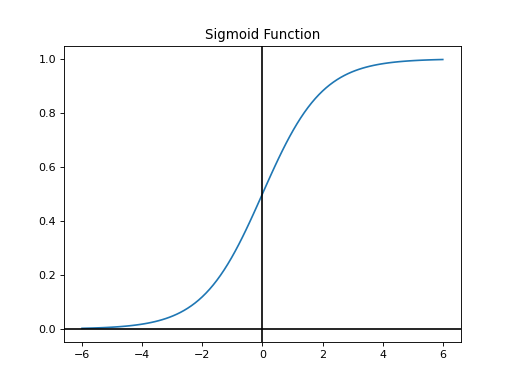

Text(0.5, 1.0, 'Sigmoid Function')

In [4]:
plt.figure()
x= np.linspace(-6,6,100)
y = logistic.cdf(x)
plt.plot (x,y)
ax= plt.gca()
# ax.set_aspect('equal')
# ax.grid(True, which='both') 

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title('Sigmoid Function')

<font color = green >

## Rectified Linear Unit (ReLU)
</font>

<IPython.core.display.Javascript object>


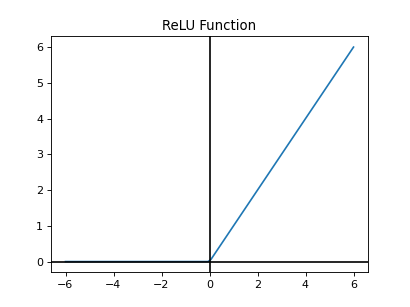

Text(0.5, 1.0, 'ReLU Function')

In [5]:
plt.figure()
x= np.linspace(-6,6,100)
y = np.maximum(x,0)
plt.plot (x,y)
ax= plt.gca()
# ax.set_aspect('equal')
# ax.grid(True, which='both') 

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title('ReLU Function')


<font color = green >

## Leaky ReLU
</font>

<IPython.core.display.Javascript object>


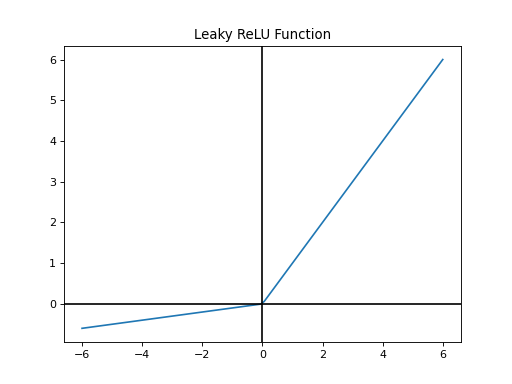

Text(0.5, 1.0, 'Leaky ReLU Function')

In [6]:
plt.figure()
x= np.linspace(-6,6,100)
y = np.maximum(x,0.1*x)
plt.plot (x,y)
ax= plt.gca()
# ax.set_aspect('equal')
# ax.grid(True, which='both') 

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title('Leaky ReLU Function')


<font color = green >

## Tanh 
</font>

<IPython.core.display.Javascript object>


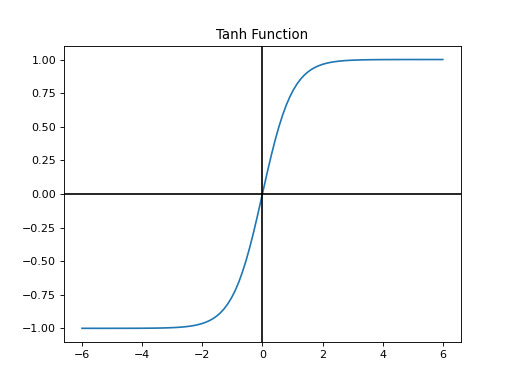

Text(0.5, 1.0, 'Tanh Function')

In [7]:
plt.figure()
x= np.linspace(-6,6,100)
y = np.tanh(x)
plt.plot (x,y)
ax= plt.gca()
# ax.set_aspect('equal')
# ax.grid(True, which='both') 

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title('Tanh Function')

<font color = green>

##  Synthetic Data

</font>



In [8]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [9]:
# help(make_blobs)

In [10]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.05,plot_symbol_size = 50, ax= None,  is_extended=True):

    '''    
    Draws the binary decision boundary for X that is nor required additional features and transformation (like polynomial)
    '''
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap
    colors_for_points = np.array(['grey', 'orange']) # neg/pos
    colors_for_areas = np.array(['grey', 'orange']) # neg/pos  # alpha is applied later 
    cmap_light = ListedColormap(colors_for_areas)
 
   
    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples 
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])

    print ('Call prediction for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Reshape the result to original meshgrid shape 
    Z = Z.reshape(xx1.shape)
    
    if ax:
        plt.sca(ax)
    
    # Plot all meshgrid prediction      
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    # Plot train set
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, 
                c=colors_for_points[y_train.ravel()], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, 
                c=colors_for_points[y_test.ravel()],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        # Create legend  
        import matplotlib.patches as mpatches # use to assign lavels for colored points 
        patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
        patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
        plt.legend(handles=[patch0, patch1])
    plt.title(title)
    if is_extended:
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False, 
        labelbottom = False
        )

        
    
def plot_data_logistic_regression(X,y,legend_loc= None, title= None):
    '''
    :param X: 2 dimensional ndarray
    :param y:  1 dimensional ndarray. Use y.ravel() if necessary
    :return:
    '''

    positive_indices = (y == 1)
    negative_indices = (y == 0)
#     import matplotlib as mpl
    colors_for_points = ['grey', 'orange'] # neg/pos

    plt.scatter(X[negative_indices][:,0], X[negative_indices][:,1], s=40, c=colors_for_points [0], edgecolor = 'black', label='negative', alpha = 0.7)
    plt.scatter(X[positive_indices][:,0], X[positive_indices][:,1], s=40, c=colors_for_points [1], edgecolor = 'black',label='positive', alpha = 0.7)
    plt.title(title)
    plt.legend(loc= legend_loc)


<IPython.core.display.Javascript object>


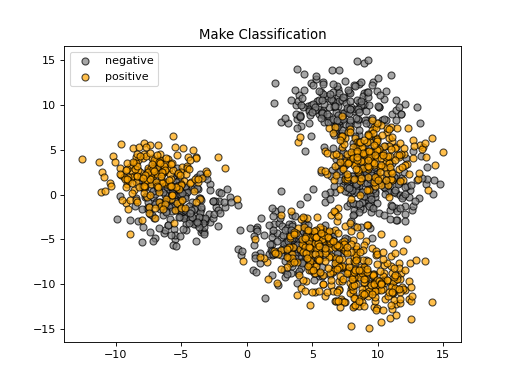

In [11]:
X_mk8, y_mk8 = make_blobs(n_samples = 2000, n_features = 2, centers = 8,cluster_std = 2, random_state = 4)
# X_mk8, y_mk8 = make_blobs( n_samples = 100, n_features = 2,centers = 8, cluster_std = 1.3,random_state = 4)

X_train, X_test, y_train, y_test  =  train_test_split(X_mk8, y_mk8 % 2, random_state= 0)
# y_train = y_mk8 % 2 # make it binary since make_blobs  with centers = 8 creates y in [0..7]
plt.figure()
plot_data_logistic_regression(X_train,y_train, title= 'Make Classification')

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
clf = MLPClassifier( # default=(100,)
    solver= 'lbfgs',
    max_iter= 10000 # default=200
).fit(X_train,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))
print("train accuracy= {:.3%}".format(clf.score (X_test,y_test)))

train accuracy= 83.867%
train accuracy= 76.800%


In [15]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity

<font color = green>

###  Single Layer Different Units Number 

</font>



<IPython.core.display.Javascript object>


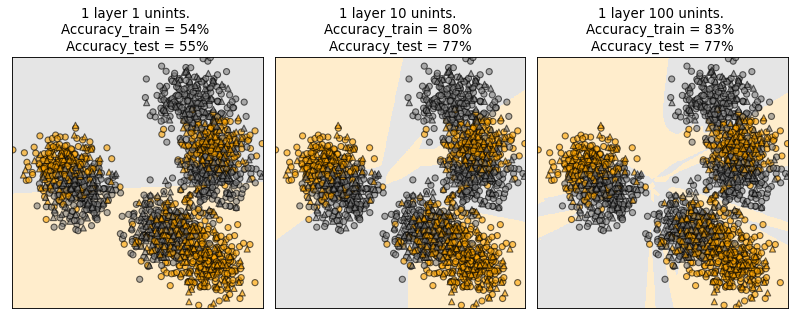

Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)


C:\Users\vko\AppData\Local\Temp/ipykernel_6148/1817772592.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)


Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)


C:\Users\vko\AppData\Local\Temp/ipykernel_6148/1817772592.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)


Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)


C:\Users\vko\AppData\Local\Temp/ipykernel_6148/1817772592.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)


In [16]:
_, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize= (10,4))
axes = (ax1, ax2, ax3)
layer_dim  = (1,10,100)
for dim, ax in  zip(layer_dim, axes):    
    clf = MLPClassifier(hidden_layer_sizes=(dim),solver= 'lbfgs', max_iter=10000).fit(X_train, y_train)
    accuracy_train = clf.score(X_train, y_train)
    accuracy_test = clf.score(X_test, y_test)    
    plot_decision_boundary(clf, X_train, y_train,  X_test=X_test, y_test= y_test,title='1 layer {} unints. \nAccuracy_train = {:.0%} \nAccuracy_test = {:.0%}'.
                           format(dim, accuracy_train, accuracy_test),
                           precision=0.05, plot_symbol_size = 30, is_extended=False, ax= ax)
plt.tight_layout()

<font color = green>

###  Regularization

</font>



<IPython.core.display.Javascript object>


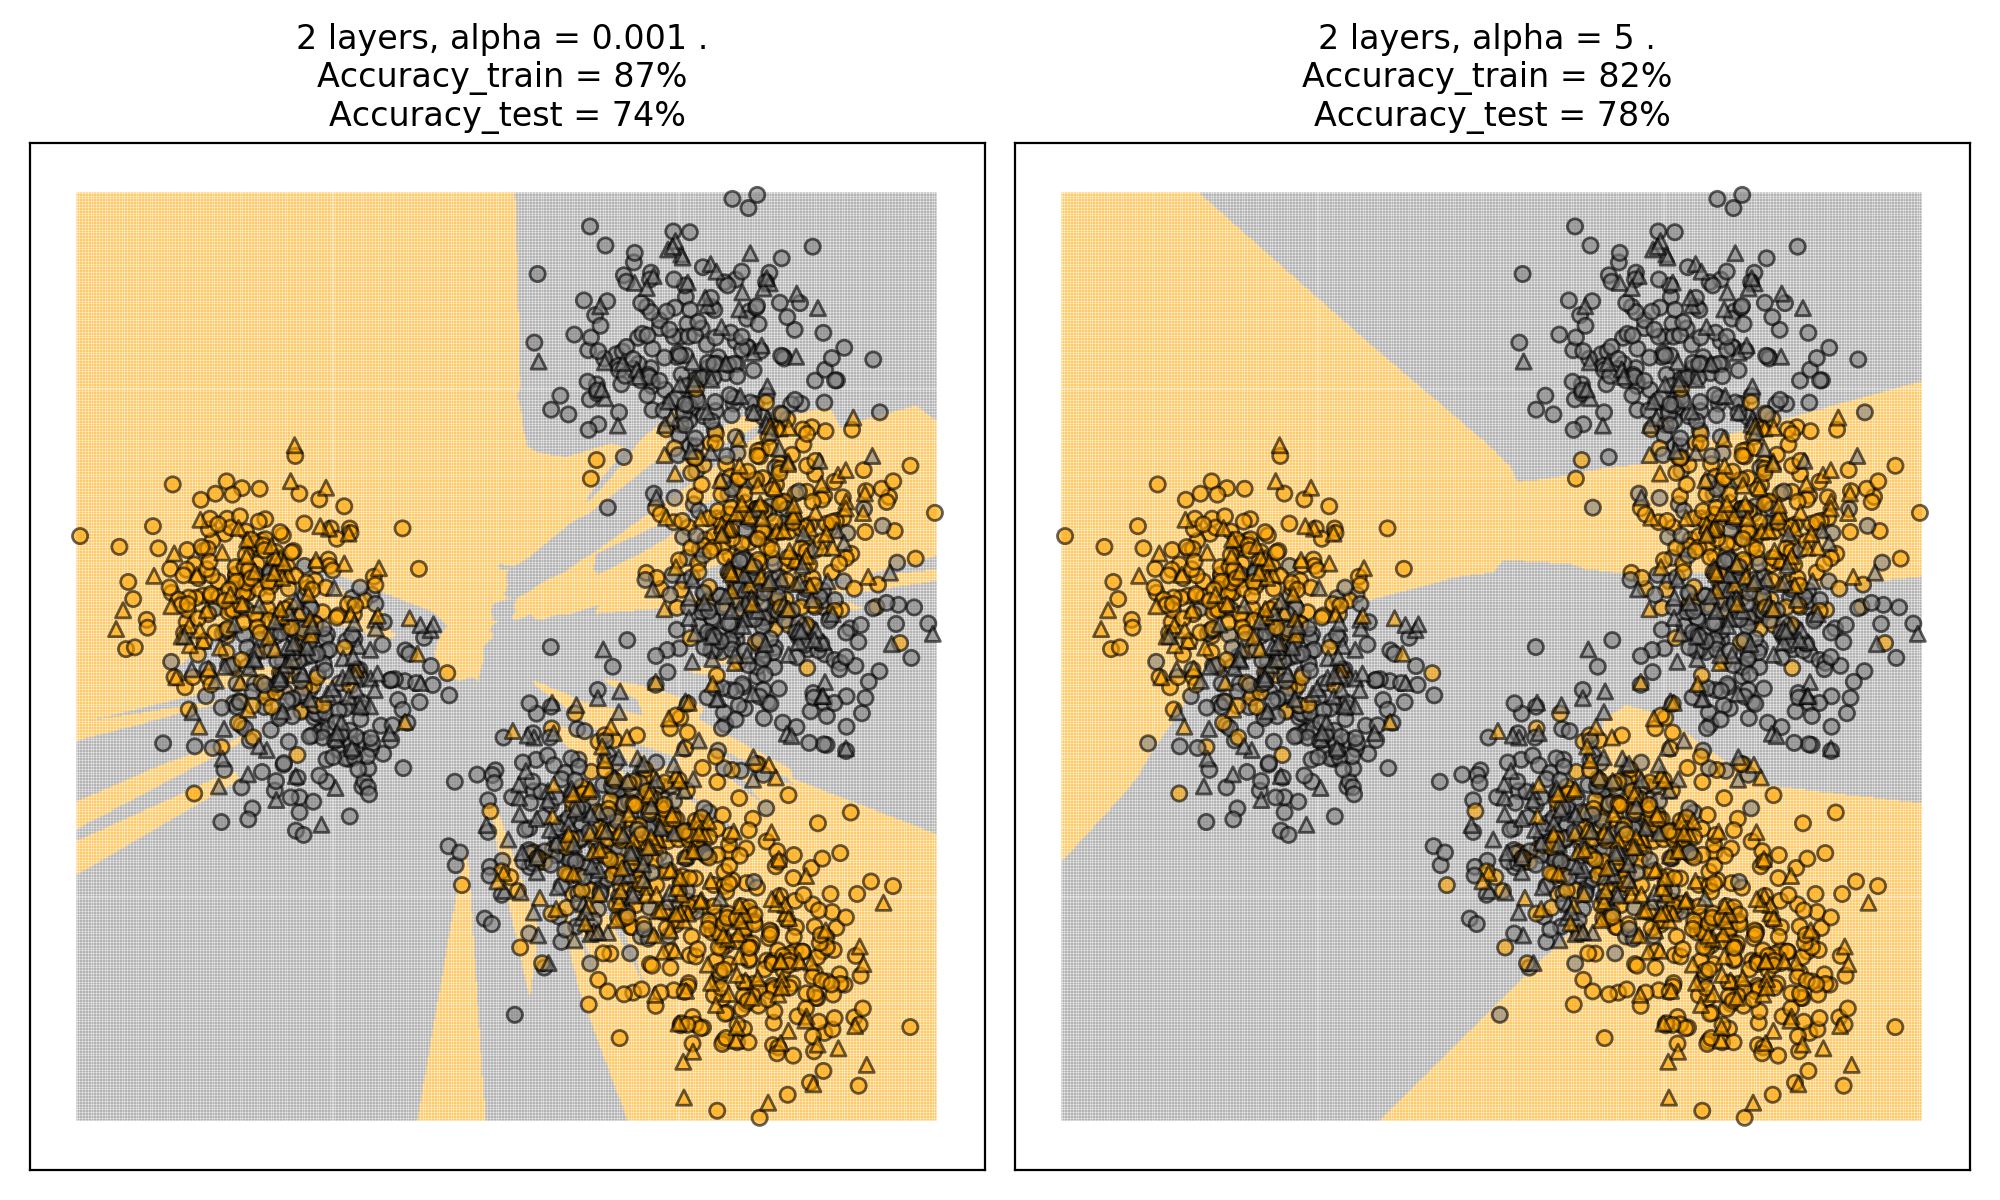

Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)
Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)


In [71]:
_, ((ax1, ax2)) = plt.subplots(1, 2, figsize= (10,6))
axes = (ax1, ax2)
alphas = (0.001, 5)
for alpha, ax in  zip(alphas, axes):    
    clf = MLPClassifier(
        hidden_layer_sizes=(100,100),
        solver= 'lbfgs', 
        alpha=alpha,
        random_state = 0,       
        max_iter= 10000
    )
    clf.fit(X_train, y_train)
    accuracy_train = clf.score(X_train, y_train)
    accuracy_test = clf.score(X_test, y_test)
 
    plot_decision_boundary(clf, X_train, y_train,X_test=X_test, y_test=y_test, title='2 layers, alpha = {} . \nAccuracy_train = {:.0%} \nAccuracy_test = {:.0%}'.
                           format(alpha, accuracy_train, accuracy_test),
                           precision=0.05, plot_symbol_size = 30, is_extended=False, ax= ax)
plt.tight_layout()

<font color = green>

###  Activation Functions

</font>



<IPython.core.display.Javascript object>


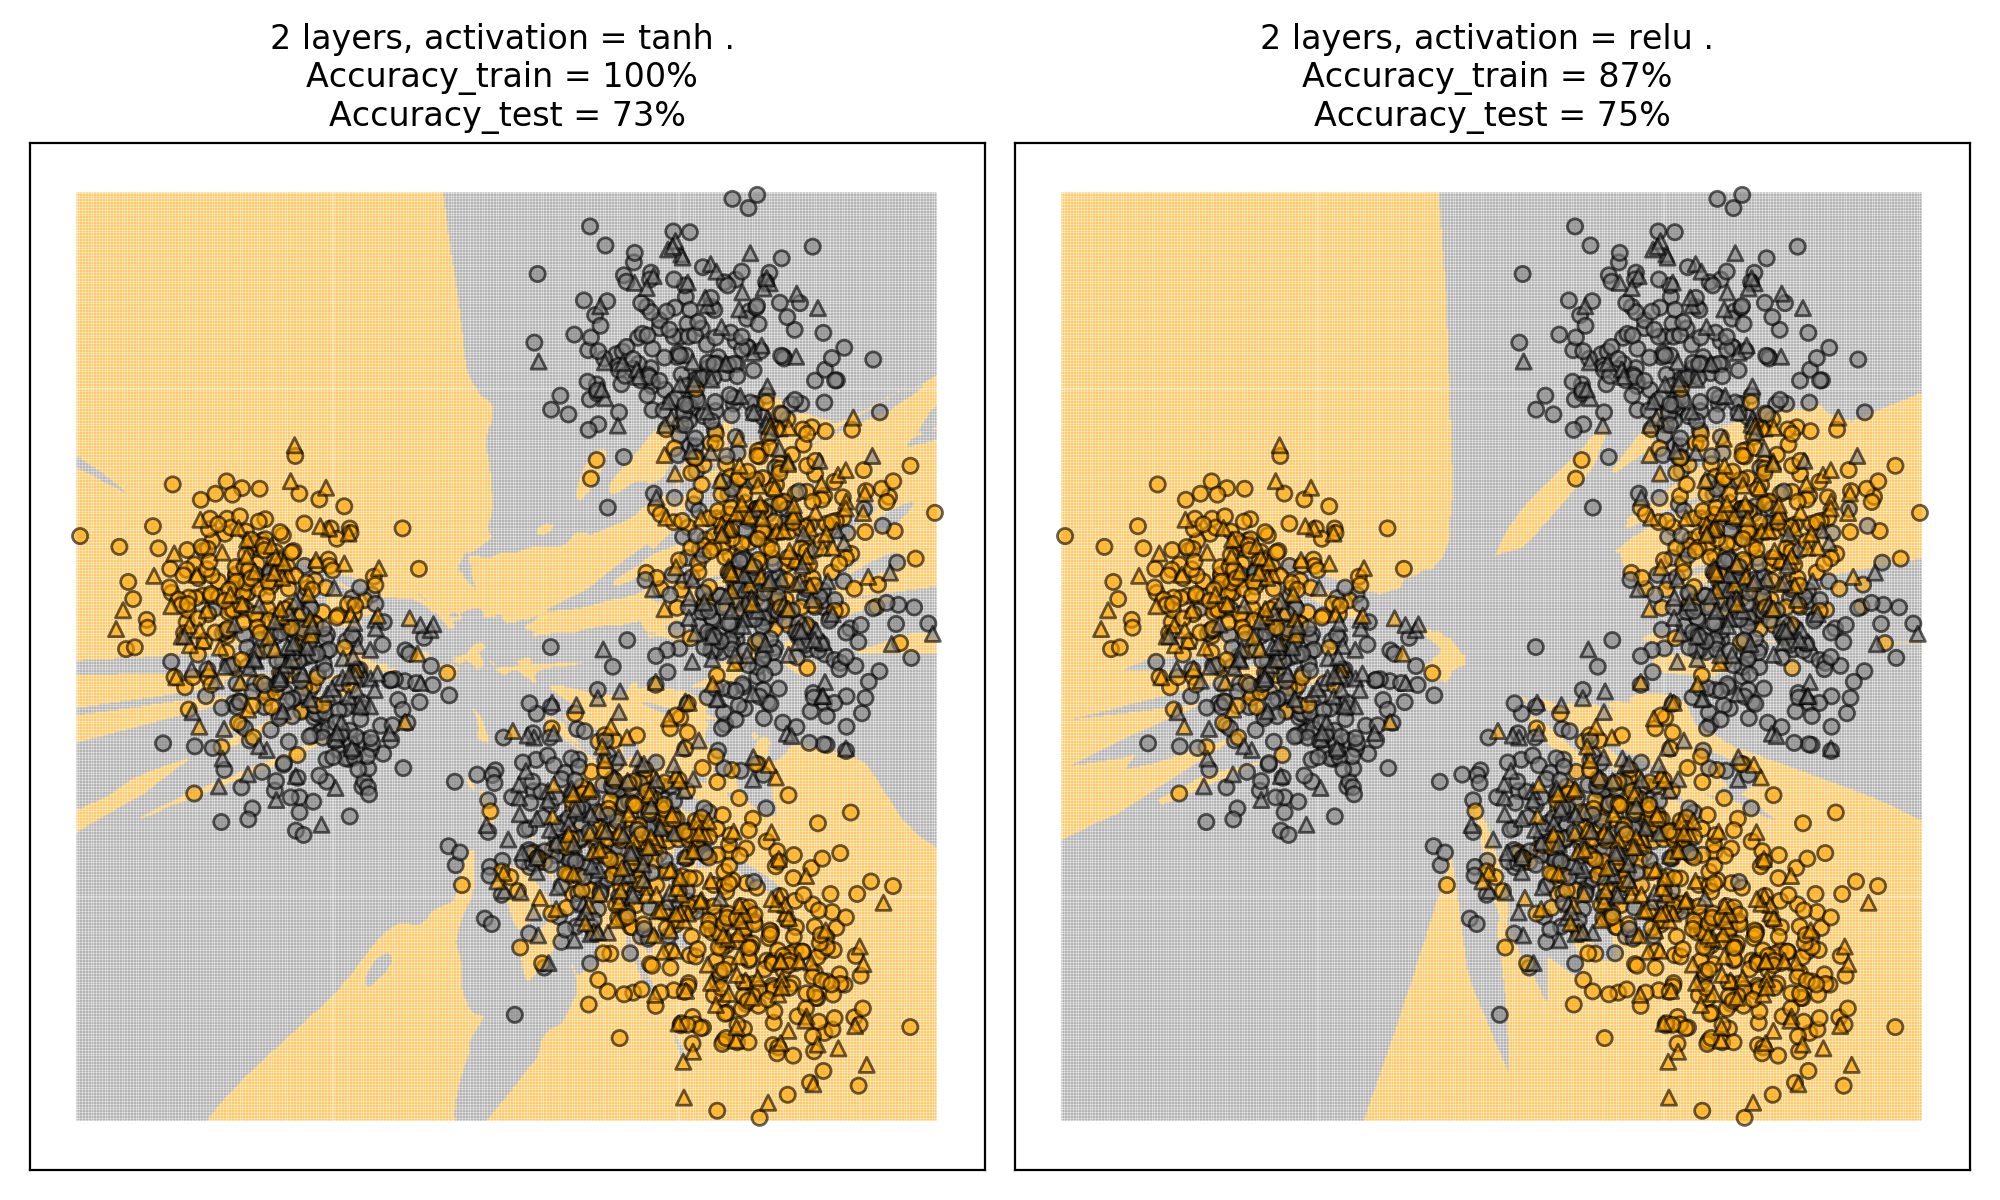

/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)


/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)


In [72]:
_, ((ax1, ax2)) = plt.subplots(1, 2, figsize= (10,6))
axes = (ax1, ax2)
activations = ('tanh', 'relu')
for activation, ax in  zip(activations, axes):    
    clf = MLPClassifier(
        hidden_layer_sizes=(100,100),
        solver= 'lbfgs', 
        random_state = 0,
        activation = activation, 
        max_iter= 10000
    )
    clf.fit(X_train, y_train)
    accuracy_train = clf.score(X_train, y_train)
    accuracy_test = clf.score(X_test, y_test)
 
    plot_decision_boundary(clf, X_train, y_train,X_test=X_test, y_test=y_test, title='2 layers, activation = {} . \nAccuracy_train = {:.0%} \nAccuracy_test = {:.0%}'.
                           format(activation, accuracy_train, accuracy_test),
                           precision=0.05, plot_symbol_size = 30, is_extended=False, ax= ax)
plt.tight_layout()

<font color = green>

##  Brest Cancer Dataset

</font>



In [17]:
# https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

X.shape=  (569, 30)
y.shape=  (569,)


In [18]:
X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state= 0)


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
clf = MLPClassifier(
    solver= 'lbfgs',
    hidden_layer_sizes= (100,100),
    random_state = 0
).fit(X_train,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test,y_test)))

train accuracy= 95.775%
test accuracy= 94.406%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [22]:
clf = MLPClassifier(
    solver= 'lbfgs',
    hidden_layer_sizes= (100,10),
    random_state = 0,
    alpha= 5
).fit(X_train_scaled,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))

train accuracy= 99.061%
test accuracy= 97.203%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
